In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.model_selection import train_test_split

from pylab import rcParams

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(columns = ['review', 'sentiment'])

In [ ]:
!unzip neg.zip

Archive:  neg.zip
  inflating: neg/cv000_29416.txt     
  inflating: neg/cv001_19502.txt     
  inflating: neg/cv002_17424.txt     
  inflating: neg/cv003_12683.txt     
  inflating: neg/cv004_12641.txt     
  inflating: neg/cv005_29357.txt     
  inflating: neg/cv006_17022.txt     
  inflating: neg/cv007_4992.txt      
  inflating: neg/cv008_29326.txt     
  inflating: neg/cv009_29417.txt     
  inflating: neg/cv010_29063.txt     
  inflating: neg/cv011_13044.txt     
  inflating: neg/cv012_29411.txt     
  inflating: neg/cv013_10494.txt     
  inflating: neg/cv014_15600.txt     
  inflating: neg/cv015_29356.txt     
  inflating: neg/cv016_4348.txt      
  inflating: neg/cv017_23487.txt     
  inflating: neg/cv018_21672.txt     
  inflating: neg/cv019_16117.txt     
  inflating: neg/cv020_9234.txt      
  inflating: neg/cv021_17313.txt     
  inflating: neg/cv022_14227.txt     
  inflating: neg/cv023_13847.txt     
  inflating: neg/cv024_7033.txt      
  inflating: neg/cv025_29825.txt

In [ ]:
!unzip pos.zip

Archive:  pos.zip
  inflating: pos/cv000_29590.txt     
  inflating: pos/cv001_18431.txt     
  inflating: pos/cv002_15918.txt     
  inflating: pos/cv003_11664.txt     
  inflating: pos/cv004_11636.txt     
  inflating: pos/cv005_29443.txt     
  inflating: pos/cv006_15448.txt     
  inflating: pos/cv007_4968.txt      
  inflating: pos/cv008_29435.txt     
  inflating: pos/cv009_29592.txt     
  inflating: pos/cv010_29198.txt     
  inflating: pos/cv011_12166.txt     
  inflating: pos/cv012_29576.txt     
  inflating: pos/cv013_10159.txt     
  inflating: pos/cv014_13924.txt     
  inflating: pos/cv015_29439.txt     
  inflating: pos/cv016_4659.txt      
  inflating: pos/cv017_22464.txt     
  inflating: pos/cv018_20137.txt     
  inflating: pos/cv019_14482.txt     
  inflating: pos/cv020_8825.txt      
  inflating: pos/cv021_15838.txt     
  inflating: pos/cv022_12864.txt     
  inflating: pos/cv023_12672.txt     
  inflating: pos/cv024_6778.txt      
  inflating: pos/cv025_3108.txt 

In [ ]:
import os
directory = "neg"
cnt = 0
for filename in os.listdir(directory):
  cnt = cnt + 1
  file = open("neg/" + filename, "r")
  FileContent = file.read()
  FileContent
  df.loc[len(df.index)] = [FileContent, "neg"]
  #df.append(FileContent, "neg")
  #print(FileContent)
  #break;
print(cnt)
      

1000


In [ ]:
directory = "pos"
cnt = 0
for filename in os.listdir(directory):
  cnt = cnt + 1
  file = open("pos/" + filename, "r")
  FileContent = file.read()
  FileContent
  df.loc[len(df.index)] = [FileContent, "pos"]
  #df.append(FileContent, "neg")
  #print(FileContent)
  #break;
print(cnt)
      

1000


In [ ]:
df

,review,sentiment
0,wild things is a way to steam up an otherwise ...,neg
1,one of the most respected names in american in...,neg
2,"after the recent animated debacles of , "" a ru...",neg
3,a highly intelligent life form that is complet...,neg
4,inspired by the 1958 film house on haunted hil...,neg
...,...,...
1995,are we victims of fate in life or can we creat...,pos
1996,"seen may 19 , 1999 at 5 p . m . at the crossga...",pos
1997,"available for rental - october 12 , 1999 \n10 ...",pos
1998,capsule : this is a harrowing look at a rarely...,pos


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
shuffled_df = df.sample(random_state=42,frac = 1).reset_index(drop=True)

In [ ]:
shuffled_df

,review,sentiment
0,leonardo decaprio ( what's eating gilbert grap...,pos
1,note : some may consider portions of the follo...,neg
2,"an energetic , visually stunning , but intelle...",pos
3,robin williams has the rarest of gifts : the a...,neg
4,warning : if you actually wish to see the film...,pos
...,...,...
1995,getting it right is a far far cry from the tee...,pos
1996,the caveman's valentine starring samuel l . ja...,pos
1997,"starring ben stiller , elizabeth hurley , mari...",neg
1998,review- peter jackson's the frighteners has re...,pos


In [ ]:
x = shuffled_df['review']
y = shuffled_df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=77)

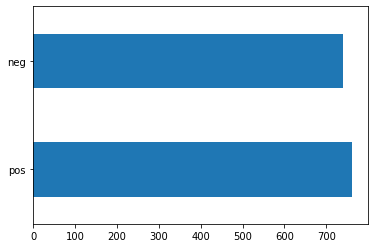

In [ ]:
y_train.value_counts().plot(kind='barh')

In [ ]:
y_test

534     neg
323     neg
1082    neg
1450    pos
1436    neg
       ... 
812     pos
1139    neg
1584    neg
1078    neg
1029    pos
Name: sentiment, Length: 500, dtype: object

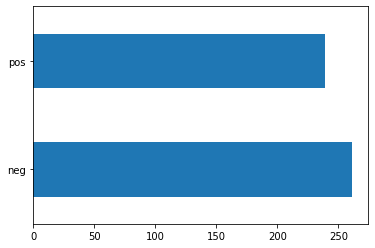

In [ ]:
y_test.value_counts().plot(kind='barh')

In [ ]:
x_train

366     when i first heard about scream in 1996 , i wa...
987     i remember hearing about this film when it fir...
100     wesley snipes is a master of selecting bad act...
84      for those of us who weren't yet born when the ...
413     alexandre dumas meets hong kong action with ne...
                              ...                        
1317    it is with some sad irony that i screened frig...
235     the 13th warrior reeks so badly of melodrama a...
1620    linda fiorentino disappeared off the radar aft...
607     when a someone journeys to the theater to see ...
727     my first press screening of 1998 and already i...
Name: review, Length: 1500, dtype: object

In [ ]:
def text_preprocessing(data):
    text = []
    for cell in data:
        new_cell = re.sub('[^a-zA-Z]',' ',str(cell))
        new_cell = new_cell.lower()
        new_cell = new_cell.split()
        new_cell = [lemma.lemmatize(word) for word in new_cell if word not in set(stopwords.words('english'))]
        text.append(' '.join(str(x) for x in new_cell))
    return text

In [ ]:
train_text = text_preprocessing(x_train)

In [ ]:
#test_text = text_preprocessing(x_test)

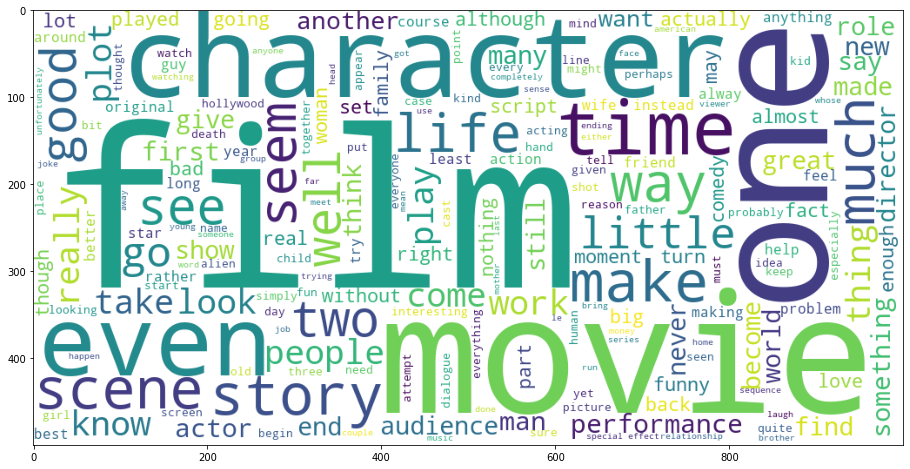

In [ ]:
rcParams['figure.figsize'] = 20,8
cloud = ""
for row in train_text:
    for word in row:
        cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(cloud)
plt.imshow(wordcloud)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
tfvectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(train_text)
y = y_train

In [ ]:
rfc = RandomForestClassifier(max_features="auto",
                                      max_depth=None,
                                      n_estimators=500,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap=True, random_state = 77)
rfc.fit(x,y)

RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=77)

In [ ]:
test_text = text_preprocessing(x_test)

In [ ]:
x_test

534     synopsis : two con artists find the perfect pa...
323     in the james bond film " diamonds are forever ...
1082    as the twin surfer dudes , stew and phil deedl...
1450    full metal jacket , very much like every other...
1436    mr . bean , a bumbling security guard from eng...
                              ...                        
812     every once in a while , when an exceptional fa...
1139    and i thought " stigmata " would be the worst ...
1584    capsule : dumb dud of an entry in the body hea...
1078    several days after having seen this movie , i'...
1029    i want to correct what i wrote in a former ret...
Name: review, Length: 500, dtype: object

In [ ]:
test_text[0]

'synopsis two con artist find perfect patsy harry woody harrelson inept former journalist trip bump head post try slap girl get poked eye ill timed fit coughing fails everything story told harry point view harry always carry around shot whiskey although swears drink one day harry approached con girl rhea elisabeth shue similar harry carry around cigarette swears smoke seduced harry agrees participate money making scheme involving faking kidnapping odette chloe sevigny teenage daughter rich man turn part needle puzzling extremely elaborate convoluted scheme involves hiring special impersonator two con order fool harry hero barely intellectual capacity wooden post kidnapped odette found dead clue point harry kidnapper murderer police hot harry trail harry suddenly realizes framed others taken ransom money get mess opinion palmetto long uninteresting film wrong feel hero harry inept bungler trip often consistently overestimate intelligence farcical kind character work best entertaining na

In [ ]:
testdata = vectorizer.transform(test_text)
predictions = rfc.predict(testdata)

Accuracy_score:  0.844
--------------------------------------------------
              precision    recall  f1-score   support

         neg       0.83      0.88      0.85       261
         pos       0.86      0.81      0.83       239

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



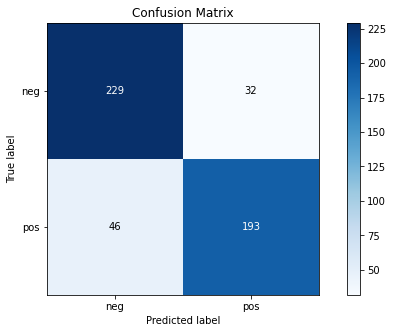

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
x = tfvectorizer.fit_transform(train_text)

In [ ]:
rfc.fit(x,y)

RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=77)

In [ ]:
testdata = tfvectorizer.transform(test_text)
predictions = rfc.predict(testdata)

Accuracy_score:  0.81
--------------------------------------------------
              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       261
         pos       0.83      0.76      0.79       239

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



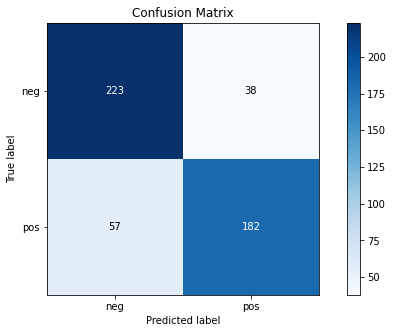

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x = vectorizer.fit_transform(train_text)

In [ ]:
classifier = LogisticRegression()
classifier.fit(x, y)

In [ ]:
testdata = vectorizer.transform(test_text)
predictions = classifier.predict(testdata)

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
x = tfvectorizer.fit_transform(train_text)


In [ ]:
classifier.fit(x, y)

In [ ]:
testdata = tfvectorizer.transform(test_text)
predictions = classifier.predict(testdata)

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
predictions_df = pd.DataFrame(columns = ['sentiment'])
for i in predictions:
  predictions_df.loc[len(predictions_df.index)] = [i]

In [ ]:
predictions_df

In [ ]:
predictions_df.value_counts().plot(kind='barh')

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCclassifier = LinearSVC()
SVCclassifier.fit(x, y)

In [ ]:
predictions = SVCclassifier.predict(testdata)

In [ ]:
predictions_df = pd.DataFrame(columns = ['sentiment'])
for i in predictions:
  predictions_df.loc[len(predictions_df.index)] = [i]

In [ ]:
predictions_df.value_counts()

In [ ]:
predictions_df.value_counts().plot(kind='barh')

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         algorithm="SAMME",
                         n_estimators=100, random_state=60)

In [ ]:
bdt.fit(x,y)
y_prediction = bdt.predict(testdata)

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,y_prediction)
acc_score = accuracy_score(y_test,y_prediction)
print('Accuracy_score: ',acc_score)
print("-"*50)
cr = classification_report(y_test,y_prediction)
print(cr)